In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pylab
from scipy import ndimage

In [12]:
def conversion():
    
    image = cv2.imread('/content/drive/MyDrive/pest.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('gray_image.png',gray_image)
    cv2_imshow(image)
  
    cv2_imshow(gray_image)
    cv2.waitKey(0)                
    cv2.destroyAllWindows()

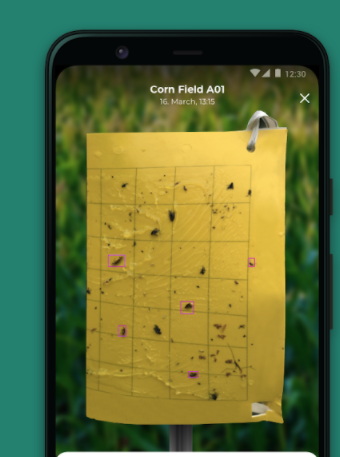

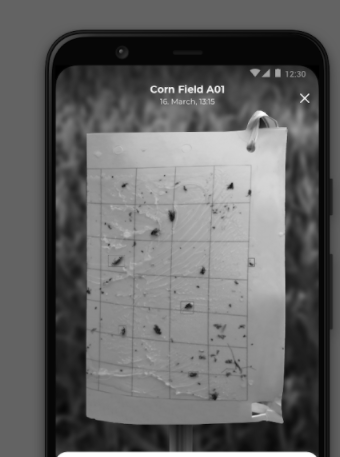

In [13]:
conversion()

In [4]:
from google.colab.patches import cv2_imshow

In [18]:
def gaussian():
    image = cv2.imread('gray_image.png')
    cv2.getGaussianKernel(9,9)
    blur= cv2.GaussianBlur(image,(5,5),0)
    cv2.imwrite('blur.png',blur)
    cv2_imshow(blur)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

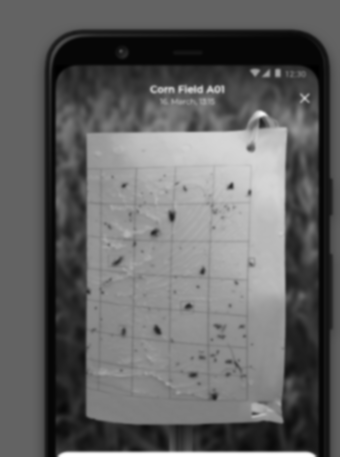

In [19]:
gaussian()

In [20]:
def averagefilter():
    image=cv2.imread('blur.png')
    kernel=np.ones((5,5),np.float32)/25
    dst= cv2.filter2D(image,-1,kernel)
    plt.subplot(121),plt.imshow(image),plt.title('blur')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(dst),plt.title('averaged')
    plt.xticks([]), plt.yticks([])
    plt.show()
    cv2.imwrite('averaged.png',dst)

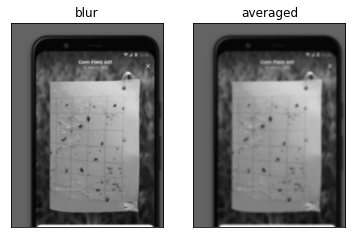

In [21]:
averagefilter()

In [29]:
def segmentation():
    image = cv2.imread('averaged.png')
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    cv2.imwrite('thresh_image.jpg',thresh)
    cv2_imshow(thresh)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

     # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    cv2_imshow(thresh)
    cv2.waitKey(0)                    
    cv2.destroyAllWindows()

     

    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    cv2_imshow(sure_bg)
    cv2.waitKey(0)                    
    cv2.destroyAllWindows()
    print("No. of pests in the image: ")
    labelarray, particle_count = ndimage.measurements.label(sure_bg)
    return particle_count

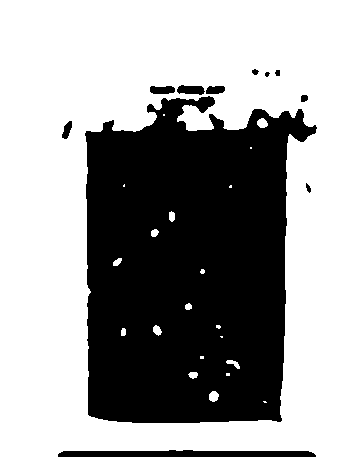

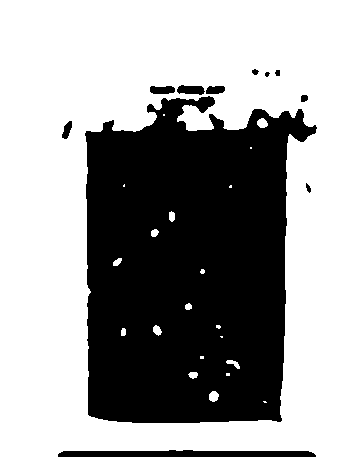

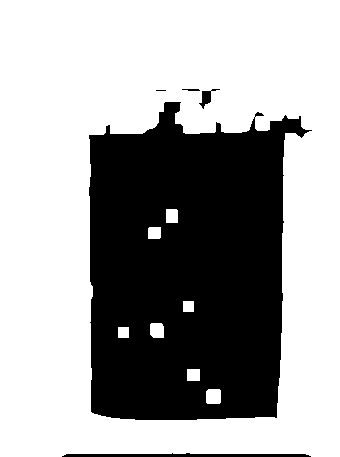

No. of pests in the image: 


8

In [30]:
segmentation()